In [34]:
%matplotlib inline
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


In [35]:
pd.read_csv('train.csv') 

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White


In [36]:
df = pd.read_csv('train.csv')

In [37]:
sum(df['AnimalID'].isnull())

0

In [38]:
for column in df.columns:
    print sum(df[column].isnull()), '\t', column

0 	AnimalID
7691 	Name
0 	DateTime
0 	OutcomeType
13612 	OutcomeSubtype
0 	AnimalType
1 	SexuponOutcome
18 	AgeuponOutcome
0 	Breed
0 	Color


In [39]:
df = pd.read_csv('train.csv')
y = df['OutcomeType'].values
df['SexuponOutcome'].fillna('Unknown', inplace=True) 
df['AgeuponOutcome'].fillna('unknown', inplace=True)
df['AnimalType'] = df['AnimalType'].map({'Dog': 0, 'Cat': 1})

def get_age_in_weeks(age_str):
    if age_str == 'unknown':
        return -50
    number, time_period = age_str.split()
    multiplicator = 1
    if time_period == 'years':
        multiplicator = 365 / 7
    elif time_period == 'months':
        multiplicator = 30 / 7
    return int(number) * multiplicator 

df['AgeuponOutcome'] = df['AgeuponOutcome'].map(get_age_in_weeks)
del df['OutcomeSubtype']
del df['AnimalID']

In [40]:
import datetime, time
def date_str2timestamp(line):
    d = datetime.datetime.strptime(line, '%Y-%m-%d %H:%M:%S')
    return int(time.mktime(d.timetuple()))

df['Timestamp'] = df['DateTime'].map(date_str2timestamp)

In [41]:
gender_and_stirilization = pd.get_dummies(df['SexuponOutcome'], 
                                          prefix='GAndS',
                                          drop_first=True)
df = pd.concat([df, gender_and_stirilization], axis=1)
del df['SexuponOutcome']

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=400, oob_score=True, 
                             random_state=42)
print clf.fit(df[['AnimalType']], y).oob_score_
print clf.fit(df[['AnimalType', 'AgeuponOutcome']], y).oob_score_
print clf.fit(df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown']], y).oob_score_
print clf.fit(df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'Timestamp']], y).oob_score_

0.44902540312
0.560327733922
0.634254929103
0.572374574432


## Timestamp переобучает!!!

In [43]:
def date_str2year(line):
    return int(line.split('-')[0])
    
def date_str2month(line):
    return int(line.split('-')[1])

def date_str2day(line):
    return int(line.split('-')[2].split()[0])

def date_str2clock(line):
    hours, minutes = line.split()[1].split(':')[:2]
    return int(minutes) + int(hours) * 60

def date_str2weekday(line):
    return datetime.datetime.strptime(
        line, 
        '%Y-%m-%d %H:%M:%S').weekday()


df['year'] = df['DateTime'].map(date_str2year)
df['month'] = df['DateTime'].map(date_str2month)
df['day'] = df['DateTime'].map(date_str2day)
df['clock'] = df['DateTime'].map(date_str2clock)
df['weekday'] = df['DateTime'].map(date_str2weekday)

In [44]:
print clf.fit(df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'year']], y).oob_score_
print clf.fit(df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'year', 'month']], y).oob_score_
print clf.fit(df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'year', 'month', 'day']], y).oob_score_
print clf.fit(df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'year', 'month', 'day', 'clock']], y).oob_score_
print clf.fit(df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'year', 'month', 'day', 'clock', 'weekday']], y).oob_score_

0.629877660967
0.605447267013
0.599199371469
0.660593363014
0.67784054772


## Успех!

In [45]:
def breed_has_mix(breed):
    return 1 if 'mix' in breed.lower() else 0

def breed_has_slash(breed):
    return 1 if '/' in breed.lower() else 0
    
df['mix'] = df['Breed'].map(breed_has_mix)
df['slash'] = df['Breed'].map(breed_has_slash)

In [46]:
print clf.fit(df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'year', 'month', 'day', 'clock', 'weekday',
                  'mix']], y).oob_score_
print clf.fit(df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'year', 'month', 'day', 'clock', 'weekday',
                  'slash']], y).oob_score_
print clf.fit(df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'year', 'month', 'day', 'clock', 'weekday',
                  'mix', 'slash']], y).oob_score_

0.676792996371
0.679449287291
0.678139848105


In [47]:
def normalize_breef(breef):
    return breef.replace('/', ' ').lower()

df['Breed'] = df['Breed'].map(normalize_breef)

In [48]:
df['breed_words_count'] = df['Breed'].map(lambda x: x.count(' '))

In [49]:
print clf.fit(df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'year', 'month', 'day', 'clock', 'weekday',
                  'breed_words_count']], y).oob_score_

print clf.fit(df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'year', 'month', 'day', 'clock', 'weekday',
                  'breed_words_count', 'slash']], y).oob_score_

0.678738448876
0.680571663736


## Успех!

## CountVectorizer

In [50]:
X = df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'year', 'month', 'day', 'clock', 'weekday',
                  'breed_words_count', 'slash']].values

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_breed_one_hot = vectorizer.fit_transform(df['Breed']).toarray()
X_with_one_hot = np.hstack((X, X_breed_one_hot))
clf.fit(X_with_one_hot, y).oob_score_

0.67361292977664711

### Most frequent:

In [53]:
most_frequent = argsort(sum(X_breed_one_hot, axis=0))[::-1]
for count in 2 ** np.arange(0, 6):
    X_with_one_hot_frequent = np.hstack(
        (X, X_breed_one_hot[:,most_frequent[:count]]))
    print count, clf.fit(X_with_one_hot_frequent, y).oob_score_

1 0.679411874743
2 0.67742900969
4 0.677054884208
8 0.677990197912
16 0.677990197912
32 0.677653484979


### Best oob_score:

In [ ]:
#Бесполезно (((

## HashingVectorizer:

In [57]:
all_columns = set(df.columns)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [56]:
from sklearn.feature_extraction.text import HashingVectorizer

for n_features in np.arange(10, 262, 40):
    hashing = HashingVectorizer(n_features=n_features, 
                                non_negative=True)
    breed_hashed = hashing.fit_transform(df['Breed']).toarray()
    X_with_hashed = np.hstack((X, breed_hashed))
    print n_features, clf.fit(X_with_hashed, y).oob_score_

10 0.677915372816
50 0.679711175128
90 0.677167121853
130 0.673500692132
170

KeyboardInterrupt: 

### Most Frequent Breeds

In [84]:
frequentcy = dict(df['Breed'].value_counts())
frequentcy.items() 

[('beagle queensland heeler', 1),
 ('black tan hound german shepherd', 1),
 ('spanish mastiff mix', 1),
 ('bluetick hound mix', 5),
 ('cocker spaniel', 20),
 ('whippet borzoi', 1),
 ('manchester terrier chihuahua shorthair', 2),
 ('scottish terrier cairn terrier', 1),
 ('chihuahua longhair pekingese', 2),
 ('border collie mastiff', 1),
 ('carolina dog mix', 39),
 ('silky terrier yorkshire terrier', 1),
 ('basset hound mix', 43),
 ('yorkshire terrier miniature schnauzer', 8),
 ('border terrier yorkshire terrier', 3),
 ('cardigan welsh corgi australian kelpie', 1),
 ('staffordshire labrador retriever', 1),
 ('alaskan husky mix', 10),
 ('great pyrenees anatol shepherd', 4),
 ('rat terrier beagle', 4),
 ('pembroke welsh corgi pit bull', 1),
 ('harrier', 2),
 ('great dane german shepherd', 1),
 ('australian shepherd nova scotia duck tolling retriever', 1),
 ('domestic medium hair mix', 839),
 ('shih tzu affenpinscher', 1),
 ('australian cattle dog bloodhound', 2),
 ('boerboel mix', 3),
 ('b

In [75]:
breeds_by_frequency = \
    sorted(frequentcy.items(), key=lambda x: x[1],
          reversed=True)
breeds_by_frequency


[('domestic shorthair mix', 8810),
 ('pit bull mix', 1906),
 ('chihuahua shorthair mix', 1766),
 ('labrador retriever mix', 1363),
 ('domestic medium hair mix', 839),
 ('german shepherd mix', 575),
 ('domestic longhair mix', 520),
 ('siamese mix', 389),
 ('australian cattle dog mix', 367),
 ('dachshund mix', 318),
 ('boxer mix', 245),
 ('miniature poodle mix', 233),
 ('border collie mix', 229),
 ('australian shepherd mix', 163),
 ('rat terrier mix', 157),
 ('catahoula mix', 157),
 ('jack russell terrier mix', 146),
 ('domestic shorthair', 143),
 ('yorkshire terrier mix', 143),
 ('chihuahua longhair mix', 142),
 ('siberian husky mix', 138),
 ('miniature schnauzer mix', 136),
 ('beagle mix', 124),
 ('rottweiler mix', 113),
 ('american bulldog mix', 109),
 ('cairn terrier mix', 102),
 ('shih tzu mix', 100),
 ('chihuahua shorthair dachshund', 98),
 ('australian kelpie mix', 95),
 ('staffordshire mix', 94),
 ('pointer mix', 93),
 ('american staffordshire terrier mix', 92),
 ('great pyrenees

In [ ]:
df2 = pd.get_dummies()
df2.columns 
 
df[['age', 'sex'] + list(df2.columns)]

In [80]:
['age', 'sex'] + ['age', 'sex']

['age', 'sex', 'age', 'sex']

In [79]:
for frequent_count in xrange(1, 100):
    breeds_arr = np.array(breeds_by_frequency)
    top_frequent = set(breeds_arr[:,0][:frequent_count])
    print top_frequent

    def get_frequent_breeds(x):
        if x in top_frequent:
            return x
        else:
            return 'not frequent'

    df['frequent_breed'] = df['Breed'].map(get_frequent_breeds)
    df_freq = pd.get_dummies(df['frequent_breed'], 
                             prefix='freq', drop_first=True)
    X_new = np.hstack([X, df_freq])
    print frequent_count, clf.fit(X_new, y).oob_score_    

 set(['domestic shorthair mix'])
1 0.679037749261
set(['pit bull mix', 'domestic shorthair mix'])
2 0.678065023009
set(['pit bull mix', 'domestic shorthair mix', 'chihuahua shorthair mix'])
3 0.67742900969
set(['pit bull mix', 'domestic shorthair mix', 'chihuahua shorthair mix', 'labrador retriever mix'])
4 0.678027610461
set(['pit bull mix', 'domestic medium hair mix', 'domestic shorthair mix', 'chihuahua shorthair mix', 'labrador retriever mix'])
5 0.677241946949
set(['pit bull mix', 'domestic shorthair mix', 'german shepherd mix', 'domestic medium hair mix', 'chihuahua shorthair mix', 'labrador retriever mix'])
6 0.67825208575
set(['pit bull mix', 'domestic shorthair mix', 'german shepherd mix', 'domestic medium hair mix', 'chihuahua shorthair mix', 'labrador retriever mix', 'domestic longhair mix'])
7 0.676980059112
set(['pit bull mix', 'domestic shorthair mix', 'german shepherd mix', 'domestic medium hair mix', 'chihuahua shorthair mix', 'siamese mix', 'labrador retriever mix', 'd

KeyboardInterrupt: 

# Закодируем частотой?

In [54]:
dict(df['Breed'].value_counts())

{'beagle queensland heeler': 1,
 'black tan hound german shepherd': 1,
 'spanish mastiff mix': 1,
 'bluetick hound mix': 5,
 'cocker spaniel': 20,
 'whippet borzoi': 1,
 'manchester terrier chihuahua shorthair': 2,
 'scottish terrier cairn terrier': 1,
 'chihuahua longhair pekingese': 2,
 'border collie mastiff': 1,
 'carolina dog mix': 39,
 'silky terrier yorkshire terrier': 1,
 'basset hound mix': 43,
 'yorkshire terrier miniature schnauzer': 8,
 'border terrier yorkshire terrier': 3,
 'cardigan welsh corgi australian kelpie': 1,
 'staffordshire labrador retriever': 1,
 'alaskan husky mix': 10,
 'great pyrenees anatol shepherd': 4,
 'rat terrier beagle': 4,
 'pembroke welsh corgi pit bull': 1,
 'harrier': 2,
 'great dane german shepherd': 1,
 'australian shepherd nova scotia duck tolling retriever': 1,
 'domestic medium hair mix': 839,
 'shih tzu affenpinscher': 1,
 'australian cattle dog bloodhound': 2,
 'boerboel mix': 3,
 'border collie great dane': 1,
 'australian cattle dog poin

In [233]:
def get_frequency_by_breed(x):
    return breed2frequency[x]

breed2frequency = dict(df['Breed'].value_counts())
df['breed_freq'] = df['Breed'].map(get_frequency_by_breed) 

In [234]:
clf.fit(df[['AnimalType', 'AgeuponOutcome',
            'GAndS_Intact Male', 'GAndS_Neutered Male',
            'GAndS_Spayed Female', 'GAndS_Unknown',
            'year', 'month', 'day', 'clock', 'weekday',
            'breed_words_count', 'slash',
            'breed_freq']], y).oob_score_

0.68240487859628118

## Успех!

## Закодируем таргетом?

In [ ]:
# нет! это будет не честно :) Но в другой раз можно

3) Постройте зависимость oob\_score\_ относительно количества деревьев в лесе и выберете оптимальное значение n_estimators.

In [92]:
sorted(zip(clf.feature_importances_, ['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'year', 'month', 'day', 'clock', 'weekday',
                  'breed_words_count', 'slash']), reverse=True)

[(0.24300912611415032, 'clock'),
 (0.163235162820656, 'AgeuponOutcome'),
 (0.13859166033574782, 'day'),
 (0.099779584339397112, 'month'),
 (0.080715347134011142, 'weekday'),
 (0.053549783930002308, 'GAndS_Neutered Male'),
 (0.05128941677562221, 'GAndS_Spayed Female'),
 (0.042944517728140695, 'year'),
 (0.039533112714112889, 'breed_words_count'),
 (0.033287291211273128, 'AnimalType'),
 (0.030634713012835796, 'GAndS_Intact Male'),
 (0.013040958031256482, 'GAndS_Unknown'),
 (0.010389325852794102, 'slash')]

In [91]:
clf.feature_importances_


array([ 0.03328729,  0.16323516,  0.03063471,  0.05354978,  0.05128942,
        0.01304096,  0.04294452,  0.09977958,  0.13859166,  0.24300913,
        0.08071535,  0.03953311,  0.01038933])

1 11 21 31 41 51 61 71 81 91 101 111 121 131 141 151 161 171 181 191 201 211 221 231 241 251 261 271 281 291 301 311 321 331 341 351 361 371 381 391 401 411 421 431 441 451 461 471 481 491 501 511 521 531 541 551 561 571 581 591 601 611 621 631 641 651 661 671 681 691 701 711 721 731 741 751 761 771 781 791 801 811 821 831 841 851 861 871 881 891 901 911 921 931 941 951 961 971 981 991

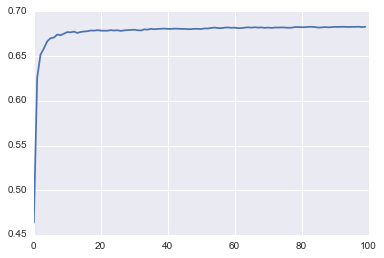

In [90]:
scores = []

clf = RandomForestClassifier(
        n_estimators=1,
        warm_start=True,
        oob_score=True)

for n in np.arange(1, 1000, 10):
    print n, 
    clf.set_params(n_estimators=n)
    scores.append(clf.fit(X, y).oob_score_) 
    
plt.plot(scores)

6) Попробуйте использовать kNN с параметрами по умолчанию. Чтобы померить качество, можно использовать cross_val_score на 5-ти фолдах.

In [142]:
from sklearn.neighbors import KNeighborsClassifier

train_columns = ['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'year', 'month', 'day', 'clock', 'weekday',
                  'breed_words_count', 'slash']
knn = KNeighborsClassifier()

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

cv_score = cross_val_score(knn, df[train_columns], y, cv=kfold)
cv_score.mean(), cv_score.std() 

(0.5469709918121094, 0.0038092345379424591)

7) Для kNN пропуски нужно заполять чем-то близким к реальности: например, средним значением параметра. Это можно сделать с помощью класса Imputer. Проверьте, на сколько отличается качество при использовании такого подхода к заполнению признаков

In [143]:
from sklearn.preprocessing import Imputer
inputer = Imputer(missing_values=-50, strategy='mean', axis=0, verbose=0, copy=True)
X_for_knn = inputer.fit_transform(df[train_columns])

In [144]:
cv_score = cross_val_score(knn, X_for_knn, y, cv=kfold)
cv_score.mean(), cv_score.std() 

(0.54640966355633958, 0.003246466749181783)

In [145]:
from sklearn.preprocessing import Imputer
inputer = Imputer(missing_values=-50, strategy='median', axis=0, verbose=0, copy=True)
X_for_knn = inputer.fit_transform(df[train_columns])
cv_score = cross_val_score(knn, X_for_knn, y, cv=kfold)
cv_score.mean(), cv_score.std()

(0.54682138217515153, 0.0032472979335231543)

8) Еще kNN любит, чтобы признаки имели схожий масштаб. Помните, мы вычитали среднее и делили на std массив? Так вот для это есть отдельный класс: sklearn.preprocessing.StandardScaler. Примените шкалирование. Удалось ли улучшить качество?

In [149]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_for_knn_scaled = scaler.fit_transform(X_for_knn)

In [150]:
cv_score = cross_val_score(knn, X_for_knn_scaled, y, cv=kfold)
cv_score.mean(), cv_score.std()

(0.62022591700658503, 0.0049515092885785757)

9) Пройдитесь GridSearch-ем по параметрам kNN (количество соседей, параметр p у метрики Минковского). Какое количество соседей оказалось оптимальным? Какая метрика расстояния?

In [156]:
%%time
from sklearn.model_selection import GridSearchCV

grid_searcher = GridSearchCV(knn, 
                             {'n_neighbors': np.arange(1,30,5)},
                              cv=kfold, n_jobs=4, verbose=True)
grid_searcher.fit(X_for_knn_scaled, y)
print 'best score:', grid_searcher.best_score_, grid_searcher.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  4.4min finished


best score: 0.641961914026 {'n_neighbors': 21}
CPU times: user 1.46 s, sys: 323 ms, total: 1.79 s
Wall time: 4min 26s


In [158]:
grid_searcher = GridSearchCV(knn,
                             {'n_neighbors': [21],
                              'p': [1, 1.5, 2, 2.5, 3]},
                              cv=kfold, n_jobs=4, verbose=True)
grid_searcher.fit(X_for_knn_scaled, y)
print 'best score:', grid_searcher.best_score_, grid_searcher.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 10.5min finished


best score: 0.644244079464 {'n_neighbors': 21, 'p': 1}
